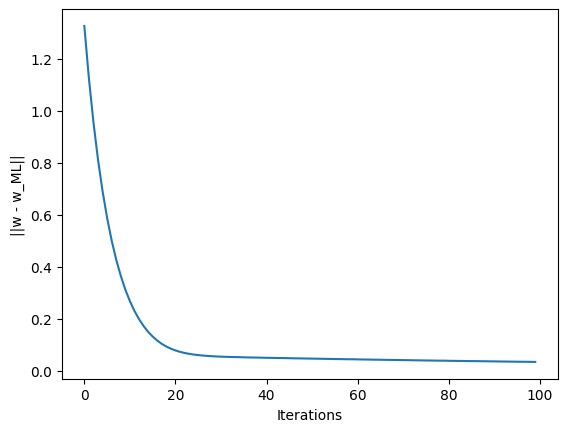

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(w, X, y):
    return np.sum((np.dot(X, w) - y) ** 2) / (2 * len(y))

# Define the gradient of the loss function
def gradient(w, X, y):
    return 2*(np.dot(X.T, (np.dot(X, w) - y)) / len(y))

# Load the data
data = np.loadtxt('A2Data_train.csv', delimiter=',')

# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Add a column of ones to X for the bias term
X = np.hstack((np.ones((len(y), 1)), X))

# Initialize the weight vector
w = np.zeros(X.shape[1])

# Set the learning rate
alpha = 0.01

# Set the number of iterations
num_iterations = 100

# Set the batch size
batch_size = 100

# Initialize the array to store the norms of w - w_ML
norms = np.zeros(num_iterations)

# Compute the maximum likelihood weight vector w_ML
w_ML = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# Perform stochastic gradient descent
for i in range(num_iterations):
    # Shuffle the data
    indices = np.random.permutation(len(y))
    X = X[indices]
    y = y[indices]
    # Split the data into batches
    num_batches = len(y) // batch_size
    for j in range(num_batches):
        X_batch = X[j*batch_size:(j+1)*batch_size]
        y_batch = y[j*batch_size:(j+1)*batch_size]
        # Calculate the gradient and update the weight vector
        grad = gradient(w, X_batch, y_batch)
        w -= alpha * grad
    # Compute the norm of w - w_ML and store it in the array
    norms[i] = np.linalg.norm(w - w_ML)

# Plot the norms of w - w_ML as a function of t
plt.plot(norms)
plt.xlabel('Iterations')
plt.ylabel('||w - w_ML||')
plt.show()
